In [1]:
#Module 6 : Performance measurements of Support Vector Machines algorithms

In [2]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Warning
import warnings 
warnings.filterwarnings('ignore')
#evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [3]:
data=pd.read_csv("human.csv")

In [4]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [5]:
data.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS
2946,0.153627,-0.018437,-0.137018,-0.330046,-0.195253,-0.164339,-0.430974,-0.218295,-0.229933,-0.111527,...,-0.436940,0.598808,-0.287951,0.876030,-0.024965,-0.660080,0.263936,0.188103,24,WALKING_UPSTAIRS


In [6]:
data.shape

(2947, 563)

In [7]:
data.size

1659161

In [8]:
data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.dropna()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS


In [11]:
data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [12]:
len(data.columns)

563

In [13]:
data.Activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [14]:
data["label"]=data.Activity.map({'STANDING':'STANDING', 'SITTING':'SITTING', 'LAYING':'LAYING', 'WALKING':'WALKING', 'WALKING_DOWNSTAIRS':'WALKING','WALKING_UPSTAIRS':'WALKING'})

In [15]:
data.label.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING'], dtype=object)

In [16]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,label
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING,STANDING


In [17]:
del data['Activity']

In [18]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000


In [19]:
#correlation
data.corr()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
tBodyAcc-mean()-X,1.000000,0.041274,-0.129645,0.016984,-0.001799,-0.008065,0.022942,-0.002124,-0.010085,0.055897,...,0.027617,0.036449,-0.582641,0.026333,0.032980,0.049701,-0.058421,0.034220,0.038936,0.005077
tBodyAcc-mean()-Y,0.041274,1.000000,0.225980,-0.054264,-0.059066,-0.077051,-0.052501,-0.062012,-0.081834,-0.047736,...,0.003481,0.003612,0.112800,-0.085717,-0.003075,0.092905,-0.017138,-0.030253,-0.027410,0.003163
tBodyAcc-mean()-Z,-0.129645,0.225980,1.000000,-0.038578,-0.048340,-0.042342,-0.037851,-0.049705,-0.037628,-0.051682,...,0.032513,0.035943,0.064029,-0.050834,-0.077898,-0.021375,-0.013933,-0.007318,-0.051057,0.021476
tBodyAcc-std()-X,0.016984,-0.054264,-0.038578,1.000000,0.910636,0.896031,0.998828,0.904884,0.890581,0.983415,...,0.215845,0.189835,-0.032731,-0.004681,0.050398,-0.033609,-0.382696,0.401433,0.388747,-0.068487
tBodyAcc-std()-Y,-0.001799,-0.059066,-0.048340,0.910636,1.000000,0.874501,0.909197,0.997942,0.873176,0.894876,...,0.256692,0.227084,-0.021857,0.008462,0.027025,-0.018611,-0.383742,0.467572,0.405681,-0.036466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroJerkMean,gravityMean)",0.049701,0.092905,-0.021375,-0.033609,-0.018611,-0.029401,-0.033386,-0.015864,-0.029735,-0.035835,...,0.000099,-0.003349,-0.043534,-0.004241,-0.103693,1.000000,0.026078,-0.000969,-0.031164,-0.003922
"angle(X,gravityMean)",-0.058421,-0.017138,-0.013933,-0.382696,-0.383742,-0.383490,-0.381896,-0.380548,-0.387125,-0.384454,...,-0.080410,-0.084848,-0.001915,0.003243,-0.008413,0.026078,1.000000,-0.668108,-0.615114,0.003138
"angle(Y,gravityMean)",0.034220,-0.030253,-0.007318,0.401433,0.467572,0.427469,0.397630,0.470157,0.428295,0.410477,...,0.086546,0.075210,0.006992,0.005806,0.004639,-0.000969,-0.668108,1.000000,0.425454,-0.047553
"angle(Z,gravityMean)",0.038936,-0.027410,-0.051057,0.388747,0.405681,0.488541,0.386152,0.406818,0.484416,0.398008,...,0.059939,0.056870,-0.003533,-0.000557,-0.004237,-0.031164,-0.615114,0.425454,1.000000,0.055885


In [20]:
#labelencoding
from sklearn.preprocessing import LabelEncoder

var_mod=["label"]
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i]).astype(int)

In [21]:
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,label
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,2
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,2
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,2
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,2
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,3
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,3
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,3
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,3


In [22]:
data.label.unique()

array([2, 1, 0, 3])

In [23]:
X = data.drop(labels='label', axis=1)
#Response variable
y = data.loc[:,'label']

In [24]:
#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [25]:
#Spport vector machines

In [26]:
#import libraries

from sklearn.svm import SVC

In [27]:
#Decision Tree Classifier Initialization
s=SVC()

In [28]:
s.fit(X_train,y_train)

SVC()

In [29]:
y_pred=s.predict(X_test)

In [30]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

# Print the performance metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.95
Precision: 0.96
Recall: 0.95
F1 Score: 0.95


In [31]:
#Classification Report
print('Classification report SVM classifier Results:')
print(classification_report(y_test,y_pred))

Classification report Random Forest classifier Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       0.91      0.80      0.86       147
           2       0.84      0.93      0.88       160
           3       1.00      1.00      1.00       417

    accuracy                           0.95       885
   macro avg       0.94      0.93      0.93       885
weighted avg       0.96      0.95      0.95       885



In [32]:
#Accuracy Score
x = (accuracy_score(y_test,y_pred)*100)
print('Accuracy result of SVM is:', x)

Accuracy result of Random Forest is: 95.48022598870057


In [33]:
cm2=confusion_matrix(y_test,y_pred)
print('Confusion Matrix result of SVM Classifier is:\n',cm2)

Confusion Matrix result of Random Forest Classifier is:
 [[161   0   0   0]
 [  0 118  29   0]
 [  0  11 149   0]
 [  0   0   0 417]]


In [34]:
specificity_1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Specificity : ', specificity_1)

Specificity :  1.0


In [35]:
sensitivity_2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Sensitivity : ', sensitivity_2)

Sensitivity :  1.0


In [36]:
def calc_sensitivity(confusion_matrix):
    """Calculate sensitivity (true positive rate) from a confusion matrix."""
    tp = confusion_matrix[1, 1]
    fn = confusion_matrix[1, 0]
    sensitivity = tp / (tp + fn)
    return sensitivity

def calc_specificity(confusion_matrix):
    """Calculate specificity (true negative rate) from a confusion matrix."""
    tn = confusion_matrix[0, 0]
    fp = confusion_matrix[0, 1]
    specificity = tn / (tn + fp)
    return specificity
confusion_matrix=cm2
sensitivity = calc_sensitivity(confusion_matrix)
specificity = calc_specificity(confusion_matrix)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 1.0
Specificity: 1.0


In [37]:
# perform k-fold cross-validation with k=accuracy
accuracy = cross_val_score(s, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)

Cross validation test results of accuracy:
[0.95084746 0.86271186 0.94906621 0.97962649 0.96943973]


In [38]:
# Perform k-fold cross-validation with k=5
scores = cross_val_score(s, X, y, cv=5)

# Print the mean and standard deviation of the scores
print("Mean score: {:.2f}".format(scores.mean()))
print("Standard deviation: {:.2f}".format(scores.std()))
print(scores)

Mean score: 0.94
Standard deviation: 0.04
[0.95084746 0.86271186 0.94906621 0.97962649 0.96943973]


In [39]:
#get the mean of each fold 

print("Accuracy result of SVM Classifier is:",accuracy.mean() * 100)

Accuracy result of Random Forest Classifier is: 94.23383499755403


In [40]:
S=accuracy.mean() * 100

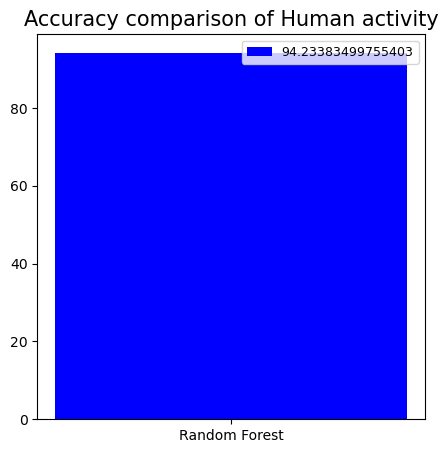

In [41]:
def graph():
    import matplotlib.pyplot as plt
    data=[S]
    alg="SVM"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("b"))
    plt.title("Accuracy comparison of Human activity",fontsize=15)
    plt.legend(b,data,fontsize=9)

graph()

In [42]:
TN = cm2[1][0]
FN = cm2[0][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 118
True Negative : 0
False Positive : 0
False Negative : 161

True Positive Rate : 0.4229390681003584
True Negative Rate : nan
False Positive Rate : nan
False Negative Rate : 0.5770609318996416

Positive Predictive Value : 1.0
Negative predictive value : 0.0


In [43]:
# def plot_confusion_matrix(cm2, title='Confusion matrix-RF', cmap=plt.cm.Blues):
#     target_names=['']
#     plt.imshow(cm2, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(target_names))
#     plt.xticks(tick_marks, target_names, rotation=45)
#     plt.yticks(tick_marks, target_names)
#     plt.tight_layout()
#     plt.ylabel('True')
#     plt.xlabel('Predicted')
# cm2=confusion_matrix(y_test, y_pred)
# print('Confusion matrix-RF:')
# print(cm2)
# plot_confusion_matrix(cm2)


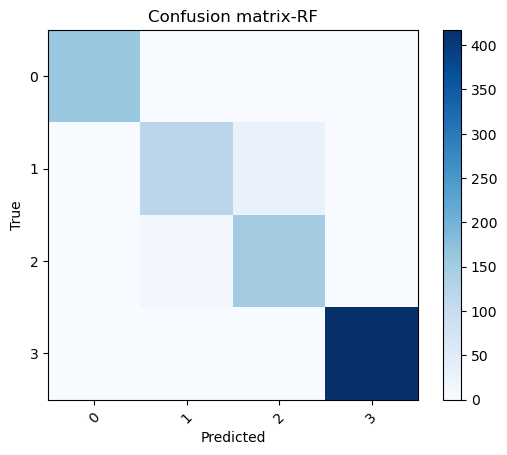

In [44]:
# Plot the confusion matrix
plt.imshow(confusion_matrix,cmap=plt.cm.Blues, interpolation='nearest')
plt.title('Confusion matrix-RF')
plt.colorbar()
tick_marks = np.arange(len(set(y)))
plt.xticks(tick_marks, set(y), rotation=45)
plt.yticks(tick_marks, set(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [45]:
from sklearn.feature_selection import RFE
# Perform feature selection using RFE with n_features_to_select=10
rfe = RFE(s, n_features_to_select=10)
X_train_new = rfe.fit_transform(X_train, y_train)
X_test_new = rfe.transform(X_test)

# Fit the model to the new feature set
s.fit(X_train_new, y_train)

# Make predictions on the test set
y_pred = s.predict(X_test_new)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_s)
print("Accuracy with feature selection: {:.2f}".format(accuracy))

In [46]:
# Perform dimensionality reduction using PCA with n_components=10
pca = PCA(n_components=10)
X_train_new = pca.fit_transform(X_train)
X_test_new = pca.transform(X_test)

# Fit the model to the new feature set
s.fit(X_train_new, y_train)

# Make predictions on the test set
y_pred = s.predict(X_test_new)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_s)
print("Accuracy with dimensionality reduction: {:.2f}".format(accuracy))